In [ ]:
# Gas Turbine Exercise

In [1]:
!pip install keras

In [3]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=2db1c56ced92ecf93578281267e45e82f39c9833c71eda1ed8752eb3f5cfdbd8
  Stored in directory: c:\users\anbuc\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [121]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

from sklearn.model_selection import train_test_split

In [122]:
df = pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [123]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return(model)

In [125]:
column_names = list(df.columns)
predictors = column_names[0:10]
target = column_names[10]

In [127]:
first_model = prep_model([10,50,1])
first_model.fit(np.array(df[predictors]),np.array(df[target]),epochs=900)
pred_train = first_model.predict(np.array(df[predictors]))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-df[target])**2))

Epoch 1/900
470/470 [==============================] - 3s 3ms/step - loss: 105.0342 - accuracy: 0.0000e+00
Epoch 2/900
470/470 [==============================] - 1s 3ms/step - loss: 63.7688 - accuracy: 0.0000e+00
Epoch 3/900
470/470 [==============================] - 1s 3ms/step - loss: 55.0874 - accuracy: 0.0000e+00
Epoch 4/900
470/470 [==============================] - 1s 2ms/step - loss: 52.6145 - accuracy: 0.0000e+00
Epoch 5/900
470/470 [==============================] - 1s 2ms/step - loss: 51.3055 - accuracy: 0.0000e+00
Epoch 6/900
470/470 [==============================] - 1s 3ms/step - loss: 53.7945 - accuracy: 0.0000e+00
Epoch 7/900
470/470 [==============================] - 1s 3ms/step - loss: 53.6890 - accuracy: 0.0000e+00
Epoch 8/900
470/470 [==============================] - 2s 4ms/step - loss: 51.2236 - accuracy: 0.0000e+00
Epoch 9/900
470/470 [==============================] - 1s 3ms/step - loss: 48.5812 - accuracy: 0.0000e+00
Epoch 10/900
470/470 [=======================

array([[1.       , 0.9194852],
       [0.9194852, 1.       ]])

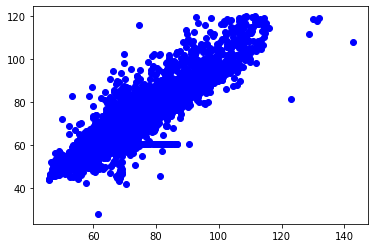

In [128]:
import matplotlib.pyplot as plt
plt.plot(pred_train,df[target],"bo")
np.corrcoef(pred_train,df[target])